This jupyter notebook serves as a quick start guide of the cv2PYNQ library.  
It demonstrates its capabilities as well as the limitations and what to pay attention to.  
This notebook was created based on [this](https://github.com/Xilinx/PYNQ-ComputerVision/tree/master/notebooks/computer_vision) template.

# Include cv2PYNQ

In [1]:
import cv2pynq as cv2

The video subsystem with HDMI
The library uses the video subsystem from the base PYNQ design.
You can access the video subsystem simply with cv2.video
It contains the HDMI-in and HDMI-out interfaces.

CAUTION: hdmi_in.start() will take some time and will fail if no incoming video signal is detected.

In [2]:
hdmi_in = cv2.video.hdmi_in
hdmi_out = cv2.video.hdmi_out

hdmi_in.configure(cv2.PIXEL_GRAY)
hdmi_out.configure(hdmi_in.mode)

hdmi_in.start()
hdmi_out.start()

print(hdmi_in.mode)

VideoMode: width=1920 height=1080 bpp=8


# Run the cv2PYNQ Sobel in the Programmable Logic

In [5]:
import time

iterations = 500

start = time.time()
for i in range(iterations):
    inframe = hdmi_in.readframe()
    outframe = hdmi_out.newframe()
    cv2.Sobel(inframe,-1,1,0,ksize=3,dst=outframe)
    inframe.freebuffer()
    hdmi_out.writeframe(outframe)
end = time.time()
print("Frames per second using cv2PYNQ:  " + str(iterations / (end - start)))

Frames per second using cv2PYNQ:  60.06258141835081


# Run the cv2PYNQ Laplacian in the Programmable Logic

In [6]:
import time

iterations = 500

start = time.time()
for i in range(iterations):
    inframe = hdmi_in.readframe()
    outframe = hdmi_out.newframe()
    cv2.Laplacian(inframe,-1,ksize=5,dst=outframe)
    inframe.freebuffer()
    hdmi_out.writeframe(outframe)
end = time.time()
print("Frames per second using cv2PYNQ:  " + str(iterations / (end - start)))

Frames per second using cv2PYNQ:  60.00302711499632


# Clean up HDMI drivers
NOTE: This is needed to reset the HDMI drivers in a clean state. If this is not run, subsequent executions of this notebook may show visual artifacts on the HDMI out (usually a shifted output image)

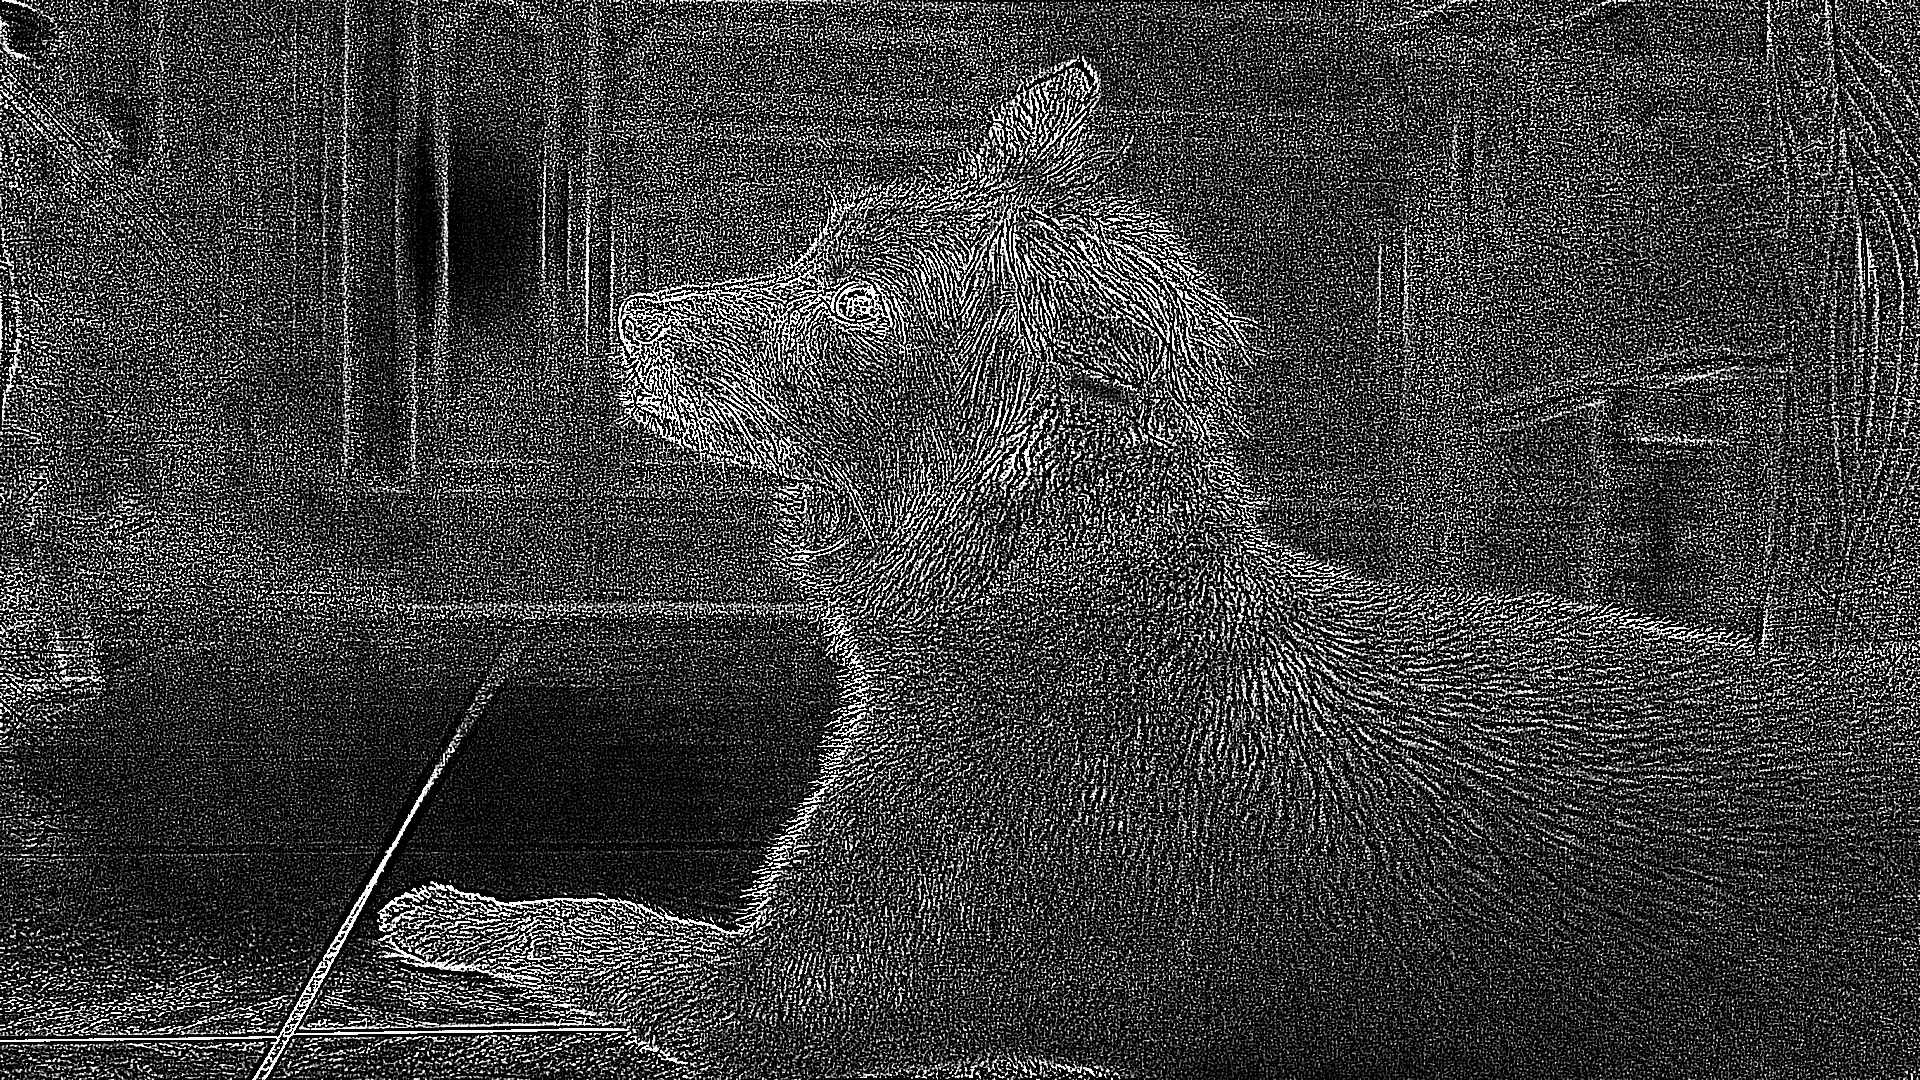

In [7]:
import PIL.Image

image = PIL.Image.fromarray(outframe)
image

In [6]:
hdmi_out.close()
hdmi_in.close()

# Clean up cv2PYNQ
NOTE: This cleanup is needed because the library allocates contiguous memory and must free it. Otherwise, it may allocate all the available contiguous memory after including it a few times. The only solution is a reboot of the device, therefore do the cleanup ;) 

In [7]:
cv2.close()